In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

from multisense_translate import MultiSenseLinearTranslator


Populating the interactive namespace from numpy and matplotlib


In [2]:
sims = MultiSenseLinearTranslator(source_mse='/mnt/permanent/Language/Hungarian/Embed/multiprot/adagram/webkorp/adagram-webkorp-800-m100_sense.mse', restrict_vocab=2**15).main()

2017-06-27 15:46:32,456 utils (267) INFO loading KeyedVectors object from /mnt/permanent/Language/English/Embed/glove.840B.300d.gensim
2017-06-27 15:46:37,169 utils (294) INFO loading syn0 from /mnt/permanent/Language/English/Embed/glove.840B.300d.gensim.syn0.npy with mmap=None
2017-06-27 15:46:39,293 utils (326) INFO setting ignored attribute syn0norm to None
2017-06-27 15:46:39,299 utils (273) INFO loaded /mnt/permanent/Language/English/Embed/glove.840B.300d.gensim
2017-06-27 15:46:39,364 multisense_translate (68) INFO Trained on 5000 words
2017-06-27 15:46:40,008 multisense_translate (198) INFO Testing...
2017-06-27 15:46:40,047 multisense_translate (144) INFO Reading source mx from /mnt/permanent/Language/Hungarian/Embed/multiprot/adagram/webkorp/adagram-webkorp-800-m100_sense.mse...
2017-06-27 15:47:06,453 multisense_translate (154) INFO Source vocab and mx read (32768, 800)
2017-06-27 15:47:16,200 multisense_translate (158) INFO Populating reverse neighbor rank mx...
2017-06-27 1

0.7079534928424653 teljesen [['wholly'], ['entirely']]  1
0.6623991831869871 elsősorban [['chiefly'], ['mainly']]  2
0.666128294695043 legnagyobb [['greatest'], ['biggest']]  3
0.5216095730748832 úr [['gentleman'], ['sir'], ['lord']]  4
0.2017976888857243 sor [['rank'], ['queue'], ['row']]  5
0.3403343828560742 út [['avenue'], ['route']]  6
1.0 kötelező [['compulsory', 'mandatory'], ['compulsory']]  7
0.29466245007040326 előre [['onward'], ['beforehand']]  8
0.11550858964218505 rendelet [['regulation'], ['doom']]  9
0.32754397008627195 komoly [['earnest'], ['grave']]  10
0.1485248268107366 kb. [['c.'], ['ca'], ['ca.']]  11
0.6058898548284379 miniszter [['secretary'], ['minister']]  12
1.0 hatalmas [['enormous', 'tremendous', 'massive', 'monumental'], ['enormous', 'massive', 'monumental'], ['enormous', 'massive'], ['tremendous'], ['massive'], ['vast'], ['enormous'], ['mighty'], ['monumental'], ['terrific']]  13
1.0 képviselő [['delegate', 'representative'], ['delegate']]  14
0.431129396

0.2574074501624708 mutató [['pointer'], ['needle']]  118
0.4622035713551237 alapos [['substantial'], ['thorough']]  119
0.352130173442485 bemutató [['premiere'], ['exhibition'], ['presenter']]  120
1.0 hamis [['fake', 'counterfeit'], ['fake'], ['counterfeit']]  121
0.3624700180548881 szokás [['usage'], ['habit']]  122
0.5537949224255493 bűn [['guilt'], ['sin']]  123
1.0 érthető [['understandable', 'articulate'], ['understandable'], ['articulate']]  124
0.48619002731028127 adminisztrátor [['administrator'], ['clerk']]  125
1.0 földrajzi [['geographic', 'geographical'], ['geographic'], ['geographical']]  126
0.10077208331273005 kar [['arm'], ['choir']]  127
0.2235376984985722 lengyel [['Pole'], ['Polish']]  128
0.8868694437545317 színház [['theater', 'theatre'], ['theatre']]  129
0.3486185114860465 kerület [['ward'], ['borough'], ['compass'], ['circumference'], ['perimeter'], ['township']]  130
0.9999999999999998 tilos [['forbidden', 'prohibited'], ['forbidden'], ['prohibited']]  131
1.0

2017-06-27 15:55:21,080 multisense_translate (105) INFO prec after testing on 1000 words: 64.600000% (good_disambig: 198)


64.6%


In [5]:
len(sims)

198

(array([ 13.,  16.,  26.,  38.,  24.,  18.,  14.,  12.,   2.,  35.]),
 array([ 0.01820678,  0.1163861 ,  0.21456542,  0.31274474,  0.41092407,
         0.50910339,  0.60728271,  0.70546203,  0.80364136,  0.90182068,  1.        ]),
 <a list of 10 Patch objects>)

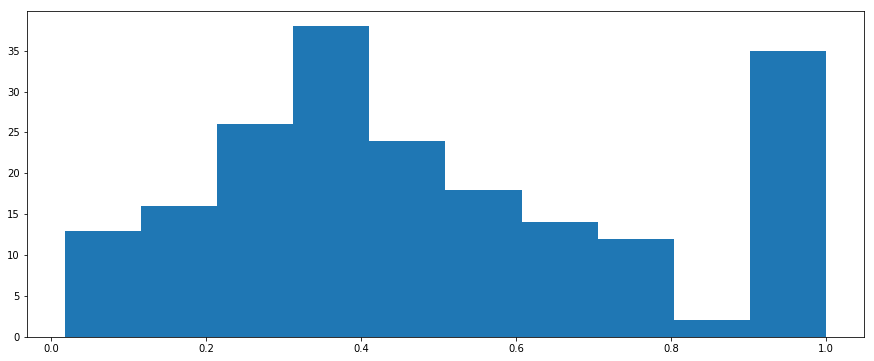

In [6]:
plt.hist(sims)